https://www.youtube.com/watch?v=5qXSeNKXNPQ

https://www.youtube.com/watch?v=ay8OMOsf6AQ

In [1]:
import torch
import matplotlib.pyplot as plt

In [2]:
xmin = -2.4
xmax = 1.2
ymin = -1.2
ymax = 1.2
maxiter = 256

w = 3200
h = 2400
dpi = 1000

In [11]:
x = torch.linspace(xmin, xmax, w).cuda() 
y = torch.linspace(ymin, ymax, h).cuda()

cx, cy = torch.meshgrid([x,y])

zx = 0*cx
zy = 0*cy

M = torch.zeros((w,h)).cuda() #Represent the color of the pixel, ininitialy 0

#z = z**2 + c == (zx+zyi)**2 + (cx+cyi) == (zx**2-zy**2+cx)+(2*zx*zy+cy)i == (zxn)+(zyn)i, complex numbers are mapped real->x and complex->y
for i in range(maxiter):
    #if zx2+zy2>4 then sqrt(zx2+zy2)>2, i.e. point's distance from (0,0) is >2, i.e. it will escape to inifinity; 
    zx2 = zx**2
    zy2 = zy**2
    M[(zx2+zy2)>4] = i #for all the points escaping to infinity, store the iteration which is plotted as a color
    zy = 2*zx*zy + cy
    zx = zx2 - zy2 + cx 
    

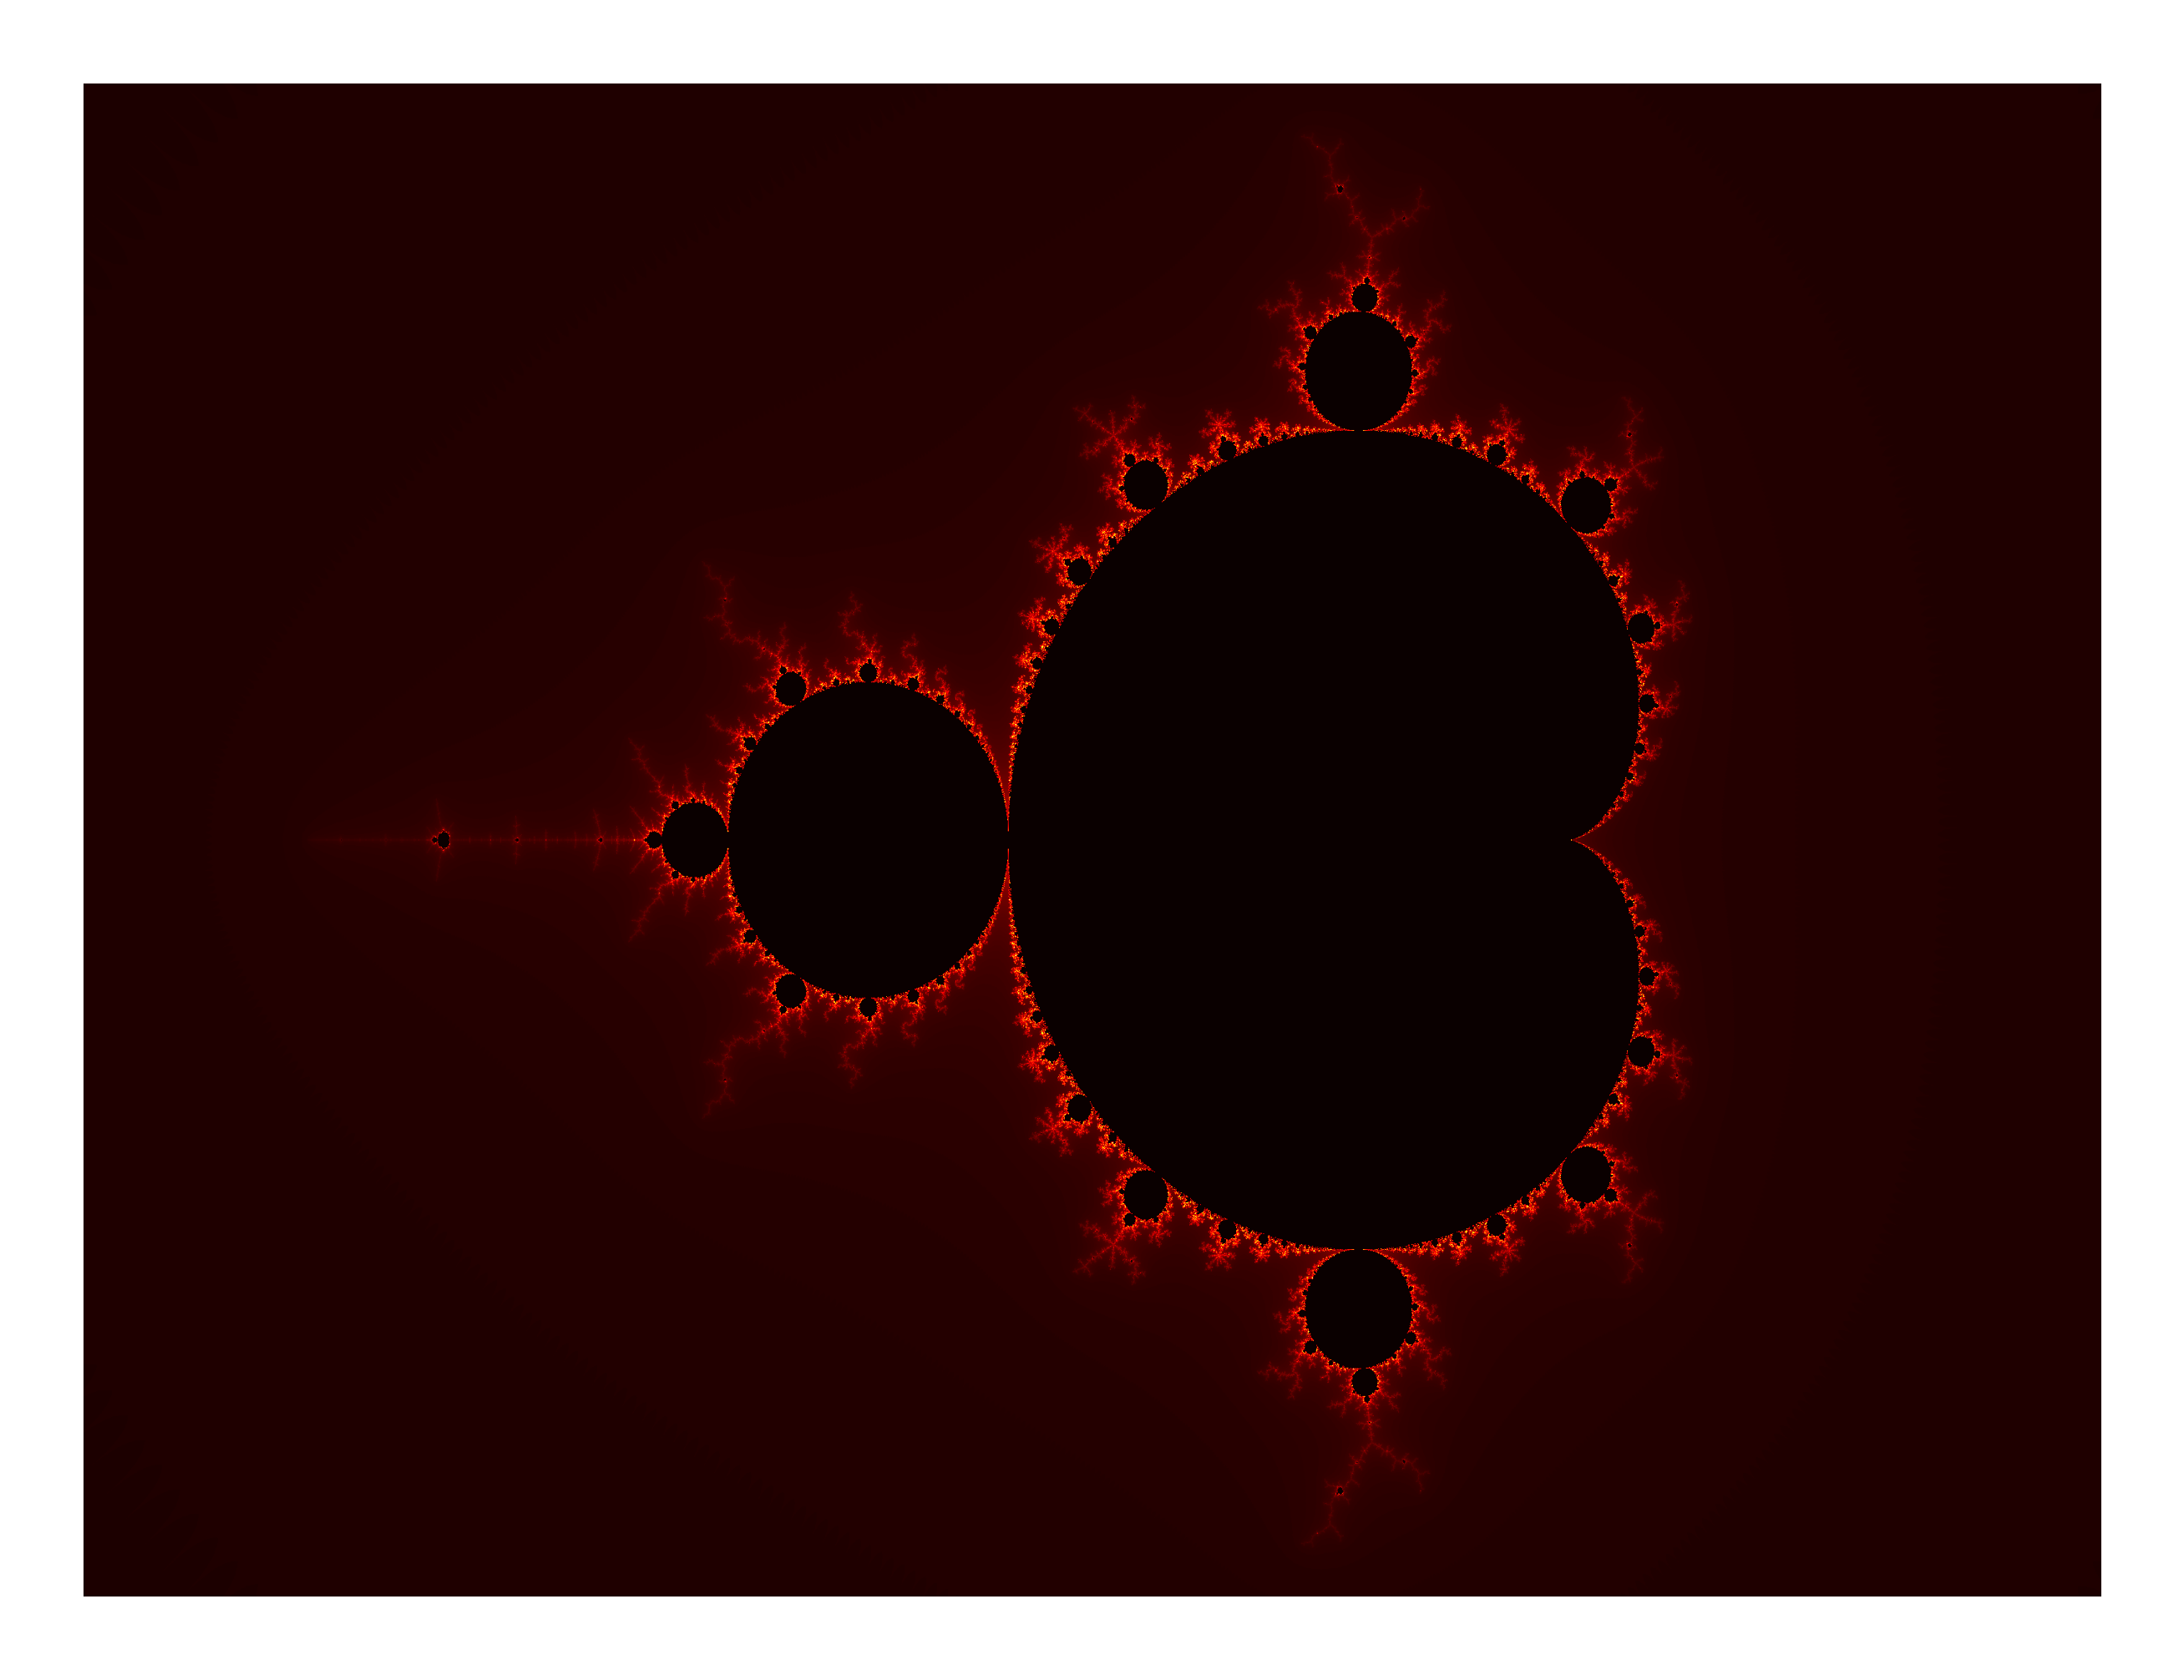

In [12]:
plt.figure(figsize=(w/dpi, h/dpi), dpi=dpi)
img = plt.imshow(M.t().cpu().numpy()) #transpose matrix, move to cpu, and plot
img.set_cmap('hot') #https://matplotlib.org/3.1.1/gallery/color/colormap_reference.html
plt.axis('off')
plt.savefig('myfig.png', dpi=dpi)